In [3]:
#%pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\nadon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     --- ------------------------------------ 0.1/1.5 MB 2.8 MB/s eta 0:00:01
     ---------------- ----------------------- 0.6/1.5 MB 6.5 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
     ---------------------------------------- 97.9/97.9 kB ? eta 0:00:00
     ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
     ---------------------------------------- 0.0/269.6 kB ? eta -:--:--
     ------------------------------------- 269.6/269.6 kB 17.3 MB/s eta 0:00:00


In [12]:
import numpy as np               
import pandas as pd 
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download()
#nltk.download('punkt')

In [2]:
reviews = pd.read_csv('yelp_labelled.csv')

In [3]:
reviews.head()

,Text,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
reviews.shape

(1000, 2)

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       1000 non-null   object
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
reviews = reviews.astype({'Text':'string'})

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       1000 non-null   string
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), string(1)
memory usage: 15.8 KB


In [9]:
text = reviews['Text']
text1 = []
for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))  
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)
text1[:5]

['wow loved this place',
 'crust is not good',
 'not tasty and the texture was just nasty',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it',
 'the selection on the menu was great and so were the prices']

In [10]:
text1 = pd.Series(text1)
text1[:5]

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
dtype: object

In [11]:
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text1[:5]

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                          selection menu great prices
dtype: object

In [13]:
def get_wordnet_pos(word):

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


lemmatizer = WordNetLemmatizer()
text3 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:5] 

0                                       wow love place
1                                           crust good
2                                  tasty texture nasty
3    stop late may bank holiday rick steve recommen...
4                           selection menu great price
dtype: object

In [15]:
label = reviews['Sentiment']

In [18]:
reviews1 = list(zip(text3, label))

reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,wow love place,1
1,crust good,0
2,tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall impressed would go back,0
998,whole experience underwhelming think well go n...,0


In [19]:
cv=CountVectorizer()
cv_reviews = cv.fit_transform(reviewsP['Review'])
cv.get_feature_names_out()

array(['absolute', 'absolutely', 'absolutley', ..., 'yum', 'yummy',
       'zero'], dtype=object)

In [20]:
print(cv_reviews)

  (0, 1654)	1
  (0, 855)	1
  (0, 1095)	1
  (1, 342)	1
  (1, 625)	1
  (2, 1459)	1
  (2, 1471)	1
  (2, 962)	1
  (3, 855)	1
  (3, 1404)	1
  (3, 813)	1
  (3, 891)	1
  (3, 99)	1
  (3, 704)	1
  (3, 1232)	1
  (3, 1397)	1
  (3, 1196)	1
  (4, 1290)	1
  (4, 912)	1
  (4, 637)	1
  (4, 1132)	1
  (5, 611)	1
  (5, 36)	1
  (5, 1599)	1
  (5, 353)	1
  :	:
  (997, 90)	1
  (997, 1024)	1
  (997, 747)	1
  (998, 1495)	1
  (998, 620)	1
  (998, 1482)	1
  (998, 1620)	1
  (998, 503)	1
  (998, 1545)	1
  (998, 973)	1
  (998, 1443)	1
  (998, 1627)	1
  (998, 977)	1
  (999, 1495)	1
  (999, 1449)	1
  (999, 476)	1
  (999, 1261)	1
  (999, 1605)	1
  (999, 241)	1
  (999, 833)	1
  (999, 174)	1
  (999, 656)	1
  (999, 1123)	1
  (999, 1653)	1
  (999, 434)	1


In [21]:
cv_reviews.shape

(1000, 1675)

In [22]:
df =  pd.DataFrame(cv_reviews.toarray(), columns=cv.get_feature_names_out())
df.head()

,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledge,...,yelpers,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tv=TfidfVectorizer()

tv_reviews=tv.fit_transform(reviewsP['Review'])

print(tv.get_feature_names_out())

['absolute' 'absolutely' 'absolutley' ... 'yum' 'yummy' 'zero']


In [24]:
tv_reviews.shape

(1000, 1675)

In [25]:
print(tv_reviews[0])

  (0, 1095)	0.3775149654879757
  (0, 855)	0.5213223479284713
  (0, 1654)	0.7653139619678703


In [26]:
feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]] 

print([get_top_tf_idf_words(tv_reviews,10)])

[array(['food', 'place', 'good', 'service', 'great', 'back', 'go', 'time',
       'like', 'come'], dtype=object)]


In [28]:
df1 =  pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())

df1['food'].describe()

count    1000.000000
mean        0.033653
std         0.100143
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.676698
Name: food, dtype: float64

<AxesSubplot: >

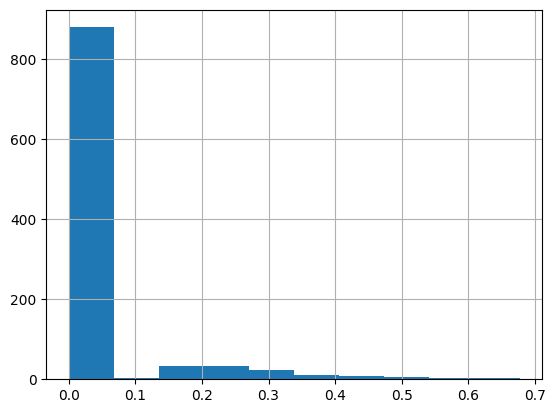

In [30]:
df1['food'].hist()

<AxesSubplot: >

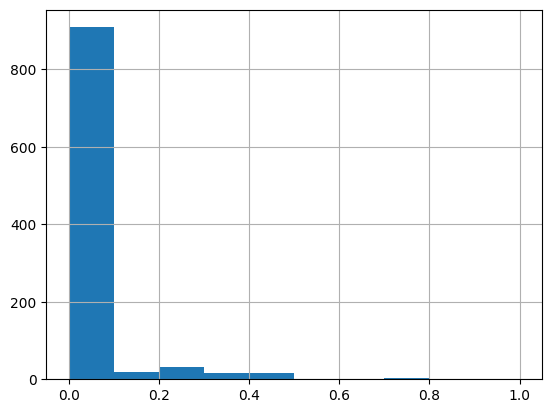

In [31]:
df1['good'].hist()